## PCA Assignment: Performing PCA on 42k Dataset

### PCA without Sckiti-Learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
l = data['label']
f = data.drop('label', axis=1)
print(l.shape)
print(f.shape)

(60000,)
(60000, 784)


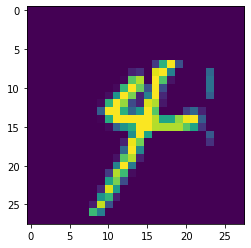

The number in the above image is:  4


In [4]:
id = 53
# id is index
# Since in one row there are 783 elemnts which is in 1-D
#to first we converting that into numpy array so that we can use reshape function
# reshaping it into rows x columns i.e. 2-D.
# 28, 28 because 28*28 = 784 which is the total elements in a single row
plot_data = f.iloc[id].to_numpy().reshape(28,28)
plt.imshow(plot_data)
plt.show()
#Checking the value in the image and in our label matches or not.
print('The number in the above image is: ', l.iloc[id])

### 2-D PCA

### Task 1: Standardize your data

In [5]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(f)
print(standardized_data.shape)

(60000, 784)


### Task 2: Create Co-Variance Matrix of your Standardized data
Co Variance Matrix = A^T * A

In [6]:
covar = np.dot(standardized_data.T, standardized_data)
#size of standardized data is (42k, 784)
#So (42k, 784) * (42k, 784) will return matrix of (784, 784)
print ( "The shape of variance matrix = ", covar.shape)

The shape of variance matrix =  (784, 784)


### Task 3: Finding the top two eigen values and vectors
Since we are converting our 784 by 784 array into 2-D

In [7]:
from scipy.linalg import eigh
# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.
#subset_by_index will take start to end value.
values, vectors = eigh(covar, subset_by_index=(782, 783))

print("Shape of eigen vectors = ",vectors.shape)

Shape of eigen vectors =  (784, 2)


In [8]:
print(values)
print(vectors)

[1754472.60943943 2429217.61887289]
[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


### Task 4: Multiplying EV to Dataset to convert to 2-D
As we know to get maximum variance in a PCA, we need to multiply our top eigen vectos with the dataset. Now our dataset is 784 by 784. If we mutiply X to get X' (xi * EV1, xi * EV2) we get matric of (2, 42k). Thus we can transform our (784 by 784) matrix to 2-D

If you recall, after we find the eigen vectors, we need to create X' (a 2-D matrix) which we get by dot product of X * EV. Remember, our dataset is (42k, 784) and EV is (784, 2) so after X.EV we get X' of (42k, 2)

In [9]:
new_cordinates = np.dot(standardized_data, vectors)
print (" resultanat new data points' shape ", standardized_data.shape, "X", vectors.shape," = ", new_cordinates.shape)

 resultanat new data points' shape  (60000, 784) X (784, 2)  =  (60000, 2)


In [10]:
print(new_cordinates)
print(new_cordinates.shape)

[[-4.81479035 -0.92215881]
 [-7.75440302  8.70897698]
 [ 9.43133817  2.32838932]
 ...
 [-3.23056436 -3.77721201]
 [-4.94812525  1.72236917]
 [-6.17538558 -1.42725062]]
(60000, 2)


Adding label column so that we can visualize the our number labels. Since new_cordinate size is (42k, 2) and label has (42k,) so if we do new_cordinate.T dot product label i.e (2, 42k) * (42k,) we get (3, 42k)

In [11]:
new_cordinates = np.vstack((new_cordinates.T, l))
new_cordinates.shape
#transpose because we want 42k rows and 3 columns and not 3 rows and 42k columns
new_cordinates = new_cordinates.T

In [12]:
# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_cordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -4.814790      -0.922159    5.0
1      -7.754403       8.708977    0.0
2       9.431338       2.328389    4.0
3      -3.746318      -6.582173    1.0
4       3.133297      -5.183251    9.0


### Task 5: Visualizing our PCA Dataset

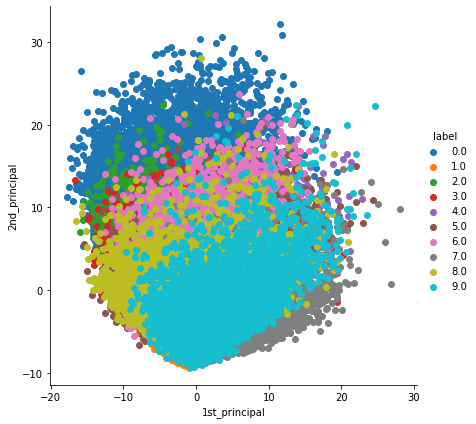

In [13]:
import seaborn as sns
sns.FacetGrid(dataframe, hue='label', height=6).map(plt.scatter, "1st_principal", "2nd_principal").add_legend()
plt.show()

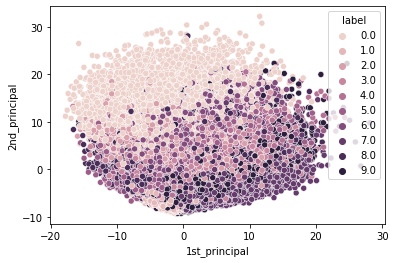

In [14]:
sns.scatterplot(x="1st_principal", y="2nd_principal", hue='label', data=dataframe, legend='full')
plt.show()

### PCA with Scikit-Learn

In [15]:
from sklearn import decomposition
pca = decomposition.PCA()

In [16]:
# configuring the parameteres
# the number of components = 2
#no of component means in which D you want to convert your dataset. Here 2-D so component is 2
pca.n_components = 2
pca_data = pca.fit_transform(standardized_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (60000, 2)


In [17]:
pca_data = np.vstack((pca_data.T, l))
pca_data = pca_data.T
pca_data.shape

(60000, 3)

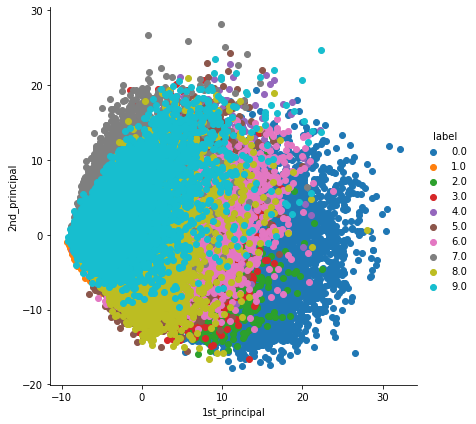

In [18]:
# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sns.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

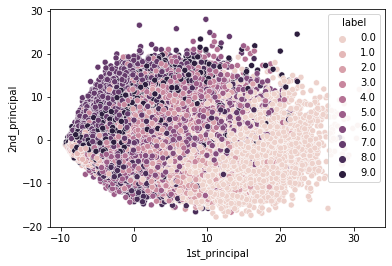

In [19]:
sns.scatterplot(x="1st_principal", y="2nd_principal", hue='label', data=pca_df, legend='full')
plt.show()

### Perfroming T-SNE on our 60k Dataset

In [20]:
# TSNE

from sklearn.manifold import TSNE

### PCA with Perplexity: 2, No of Iteration: 1000

C:\Users\nooru\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


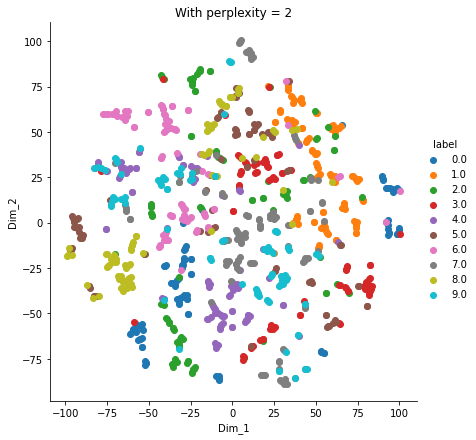

In [21]:
data_1000 = standardized_data[0:1000,:]
labels_1000 = l[0:1000]

model = TSNE(n_components=2, random_state=0, perplexity=2)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 2')
plt.show()

### PCA with Perplexity: 30, No of Iteration: 1000 (It took me around 25 minutes to get the output)

C:\Users\nooru\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


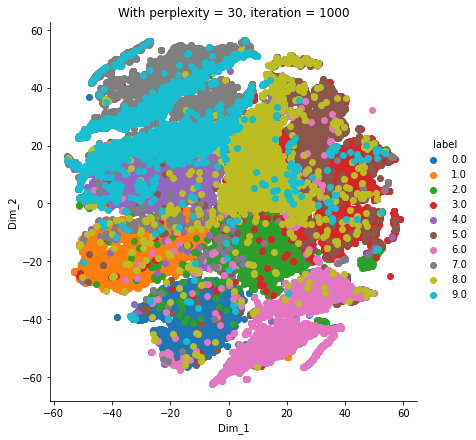

In [22]:
model = TSNE(n_components=2, random_state=0, perplexity=30)
tsne_data = model.fit_transform(standardized_data) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, l)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 30, iteration = 1000')
plt.show()

### PCA with Perplexity: 50, No of Iteration: 1000 (It took me around 40 minutes to get the output)

C:\Users\nooru\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


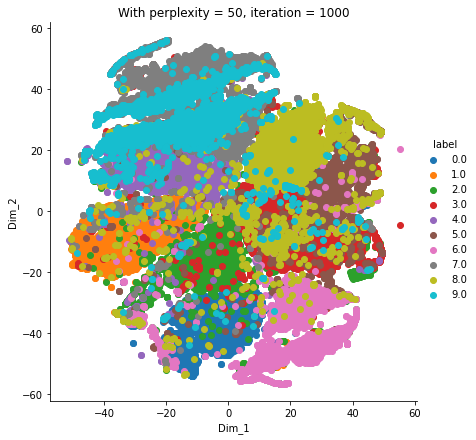

In [23]:
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(standardized_data) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, l)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, iteration = 1000')
plt.show()

### PCA with Perplexity: 50, No of Iteration: 5000 (It took me around 55 minutes to get output)

C:\Users\nooru\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


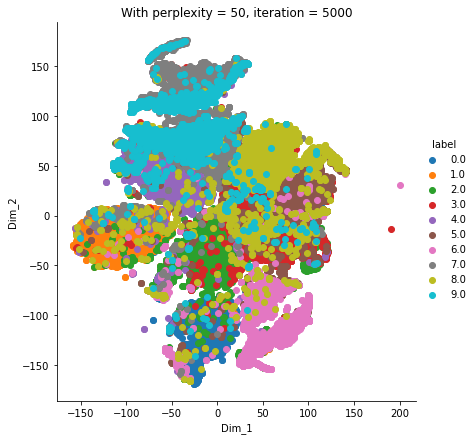

In [24]:
model = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=5000)
tsne_data = model.fit_transform(standardized_data) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, l)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, iteration = 5000')
plt.show()